In [ ]:
# integrate - project - Enhancing Motor Insurance in the United States: A Data-Driven Approach by KHOLISWA NTSHINGA

In [2]:
import pandas as pd
import numpy as np
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Load the data from an Excel file
file_path = 'C:/Users/kholi/OneDrive/Documents/Data Science/Integrate Project/insurance_claims_raw.xlsx'
df = pd.read_excel(file_path)

# Step 1: Copy data
df_copy = df.copy()

# Check the initial number of rows
print("Initial number of rows:", df_copy.shape[0])

# Step 2: Remove rows of high missing data
# Define a less strict threshold for the maximum allowed percentage of missing values in a row
threshold = 0.7
df_copy = df_copy[df_copy.isnull().mean(axis=1) < threshold]

# Check the number of rows after removing high missing data rows
print("Number of rows after removing rows with high missing data:", df_copy.shape[0])

# Step 3: Calculate 5 number summary
five_num_summary = df_copy.describe().loc[['min', '25%', '50%', '75%', 'max']]
print("Five Number Summary:\n", five_num_summary)

# Step 4: Impute missing values
# Impute missing numerical values with the median
numerical_cols = df_copy.select_dtypes(include=[np.number]).columns
df_copy[numerical_cols] = df_copy[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Impute missing categorical values with the mode
categorical_cols = df_copy.select_dtypes(include=['object']).columns
df_copy[categorical_cols] = df_copy[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Check the number of rows after imputing missing values
print("Number of rows after imputing missing values:", df_copy.shape[0])

# Step 5: Correct or remove outliers
# Using a less aggressive method to identify and remove outliers

def remove_outliers(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    # Instead of removing, we can clip the values to the bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for col in numerical_cols:
    before = df_copy.shape[0]
    df_copy = remove_outliers(df_copy, col)
    after = df_copy.shape[0]
    print(f"Number of rows after handling outliers in {col}: {after} (removed {before - after} rows)")

# Display the top 20 lines of the cleaned data
print("Top 20 rows of the cleaned data:\n", df_copy.head(20))

# Save the cleaned data to a new Excel file
cleaned_file_path = 'cleaned_data.xlsx'
df_copy.to_excel(cleaned_file_path, index=False)

print("Data cleaning completed. Cleaned data saved to 'cleaned_data.xlsx'")


Current Working Directory: C:\Users\kholi\OneDrive\Documents\Data Science\Unsupervised Learning - Sprint 7
Initial number of rows: 1000
Number of rows after removing rows with high missing data: 1000
Five Number Summary:
      months_as_customer   age  policy_number  policy_deductable  \
min                0.00  19.0      100804.00              500.0   
25%              115.75  32.0      335980.25              500.0   
50%              199.50  38.0      533135.00             1000.0   
75%              276.25  44.0      759099.75             2000.0   
max              479.00  64.0      999435.00             2000.0   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
min                 433.33      -1000000.0     430104.0            0.0   
25%                1090.32             0.0     448404.5            0.0   
50%                1257.83             0.0     466445.5            0.0   
75%                1415.74             0.0     603251.0        51075.0   
max  

Data cleaning completed. Cleaned data saved to 'cleaned_data.xlsx'


In [3]:
# THE FOLLOWING CELLS WILL BE FOCUSING ON DATA CLEANING AND FEATURE ENGINEERING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from an Excel file
file_path = 'C:/Users/kholi/OneDrive/Documents/Data Science/Integrate Project/insurance_claims_raw.xlsx'
df = pd.read_excel(file_path)
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


In [4]:
null_counts = df.isnull().sum()
null_counts

months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             2
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df_new = df.drop("_c39", axis = 1)

In [6]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


In [7]:
df_new.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,998.000000,1000.000000,998.000000,997.000000,1.000000e+03,1000.000000,998.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,996.000000,999.000000,999.000000,1000.000000,1000.000000
mean,203.954000,38.962926,546238.648000,1134.268537,1257.001113,1.101000e+06,501214.488000,25176.452906,-26793.700000,11.644000,1.83900,0.992000,1.487000,52767.469880,7434.944945,7398.628629,37928.950000,2005.103000
std,115.113174,9.135425,257063.005276,611.251914,244.265051,2.297407e+06,71701.610941,27877.379027,28104.096686,6.951373,1.01888,0.820127,1.111335,26405.348039,4883.158265,4827.050887,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.320000,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.500000,4290.000000,4440.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.830000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,57935.000000,6780.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.740000,0.000000e+00,603251.000000,51075.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70620.000000,11310.000000,10890.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


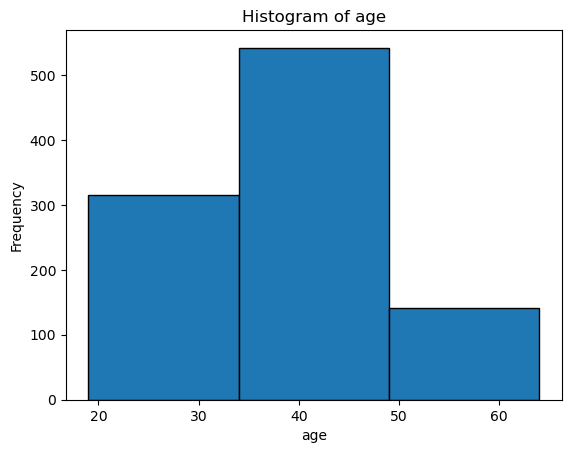

In [8]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [9]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['ages_category'] = pd.cut(df_new['age'], bins=bin_edges, labels=bin_labels)

In [10]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged


In [11]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['customer_category'] = pd.cut(df_new['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [12]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


In [13]:
df_new["Contract Years"] = df_new["months_as_customer"]/12

In [14]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


In [15]:
df_new['total_premiums_paid'] = (df_new['policy_annual_premium']/12) * df_new['months_as_customer']

In [16]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000


In [17]:
df_new['net_value_of_customer'] = df_new['total_premiums_paid'] - df_new['total_claim_amount']

In [18]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


In [19]:
df_new.to_csv('Advanced Features Claims Data.csv')

In [ ]:
# THIS SECTION WILL BE FOCUSING ON THE FRAUD DETECTION MODELLING

In [20]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'C:/Users/kholi/OneDrive/Documents/Data Science/Integrate Project/Advanced Features Claims Data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


In [21]:
# Check for missing values
missing_values = df.isnull().sum()

# Convert categorical variables into numerical representations
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the columns with missing values and their counts
missing_values[missing_values > 0], df_encoded.head()


(age                        2
 policy_deductable          2
 policy_annual_premium      3
 insured_education_level    1
 insured_hobbies            2
 capital-gains              2
 authorities_contacted      2
 incident_state             2
 total_claim_amount         4
 injury_claim               1
 property_claim             1
 ages_category              2
 customer_category          1
 total_premiums_paid        3
 net_value_of_customer      7
 dtype: int64,
    Unnamed: 0  months_as_customer   age  policy_number  policy_deductable  \
 0           0                 328  48.0         521585             1000.0   
 1           1                 228  42.0         342868             2000.0   
 2           2                 134  29.0         687698             2000.0   
 3           3                 256  41.0         227811             2000.0   
 4           4                 228  44.0         367455             1000.0   
 
    policy_annual_premium  umbrella_limit  insured_zip  capital-g

C:\Users\kholi\AppData\Local\Temp\ipykernel_2992\1158079826.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)
C:\Users\kholi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


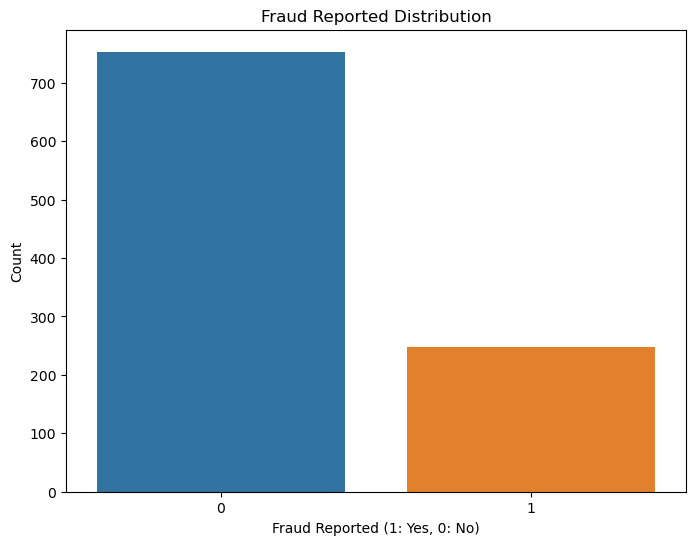

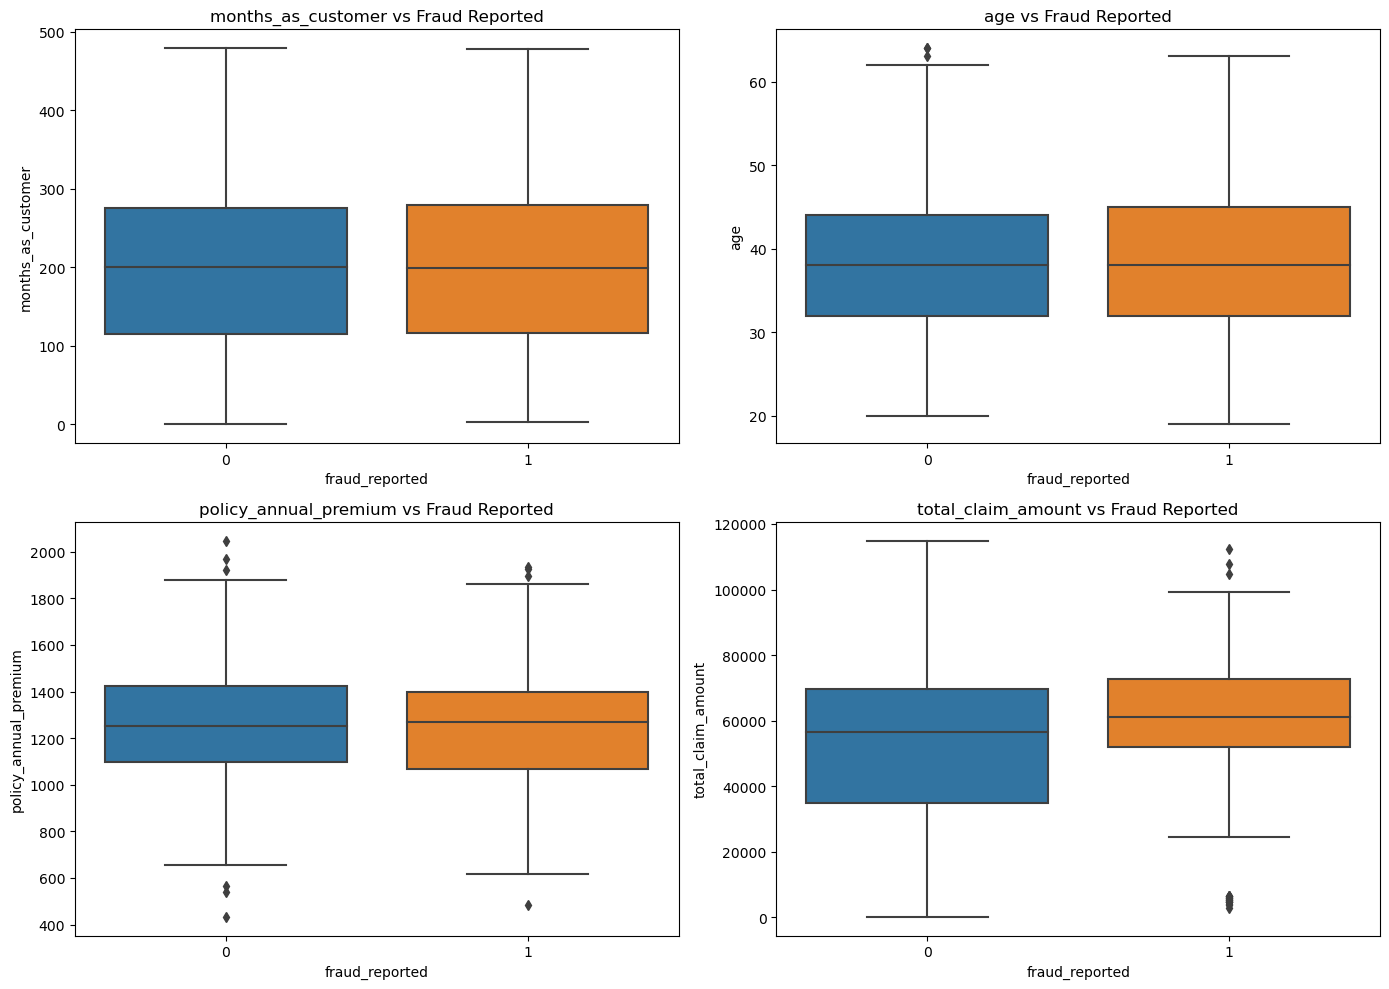

(0,
    months_as_customer   age  policy_annual_premium  total_claim_amount  \
 0                 328  48.0                1406.91             71610.0   
 1                 228  42.0                1197.22              5070.0   
 2                 134  29.0                1413.14             34650.0   
 3                 256  41.0                1415.74             63400.0   
 4                 228  44.0                1583.91              6500.0   
 
    fraud_reported  
 0               1  
 1               1  
 2               0  
 3               1  
 4               0  )

In [22]:
# Fill missing values
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Verify if all missing values are handled
missing_values_after = df.isnull().sum().sum()

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'fraud_reported' to numerical for visualization
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

# Plot the distribution of fraud cases
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud_reported', data=df)
plt.title('Fraud Reported Distribution')
plt.xlabel('Fraud Reported (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between 'fraud_reported' and a few key features
features_to_plot = ['months_as_customer', 'age', 'policy_annual_premium', 'total_claim_amount']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='fraud_reported', y=feature, data=df)
    plt.title(f'{feature} vs Fraud Reported')
plt.tight_layout()
plt.show()

missing_values_after, df[['months_as_customer', 'age', 'policy_annual_premium', 'total_claim_amount', 'fraud_reported']].head()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
df = pd.read_csv('C:/Users/kholi/OneDrive/Documents/Data Science/Integrate Project/Advanced Features Claims Data.csv')

# Fill missing values
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Convert categorical variables into numerical representations
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df_encoded.drop(columns=['fraud_reported_Y'])
y = df_encoded['fraud_reported_Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", feature_importance.head(10))

C:\Users\kholi\AppData\Local\Temp\ipykernel_2992\1122183612.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


Confusion Matrix:
 [[219   1]
 [ 80   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       220
           1       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300


Top 10 Important Features:
 policy_annual_premium             0.022687
property_claim                    0.022114
insured_hobbies_chess             0.021528
insured_zip                       0.021089
total_claim_amount                0.020898
policy_number                     0.020393
incident_severity_Minor Damage    0.020312
vehicle_claim                     0.020090
Unnamed: 0                        0.019651
incident_severity_Total Loss      0.019449
dtype: float64


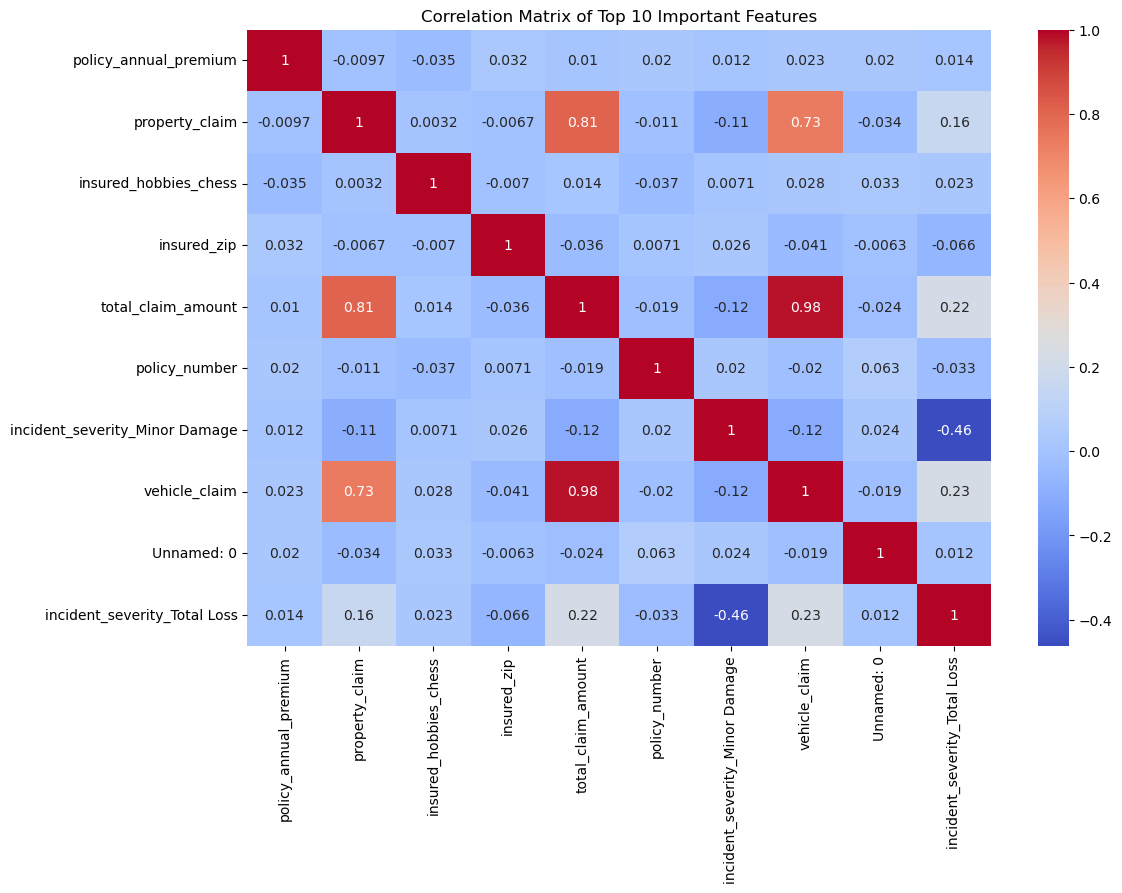

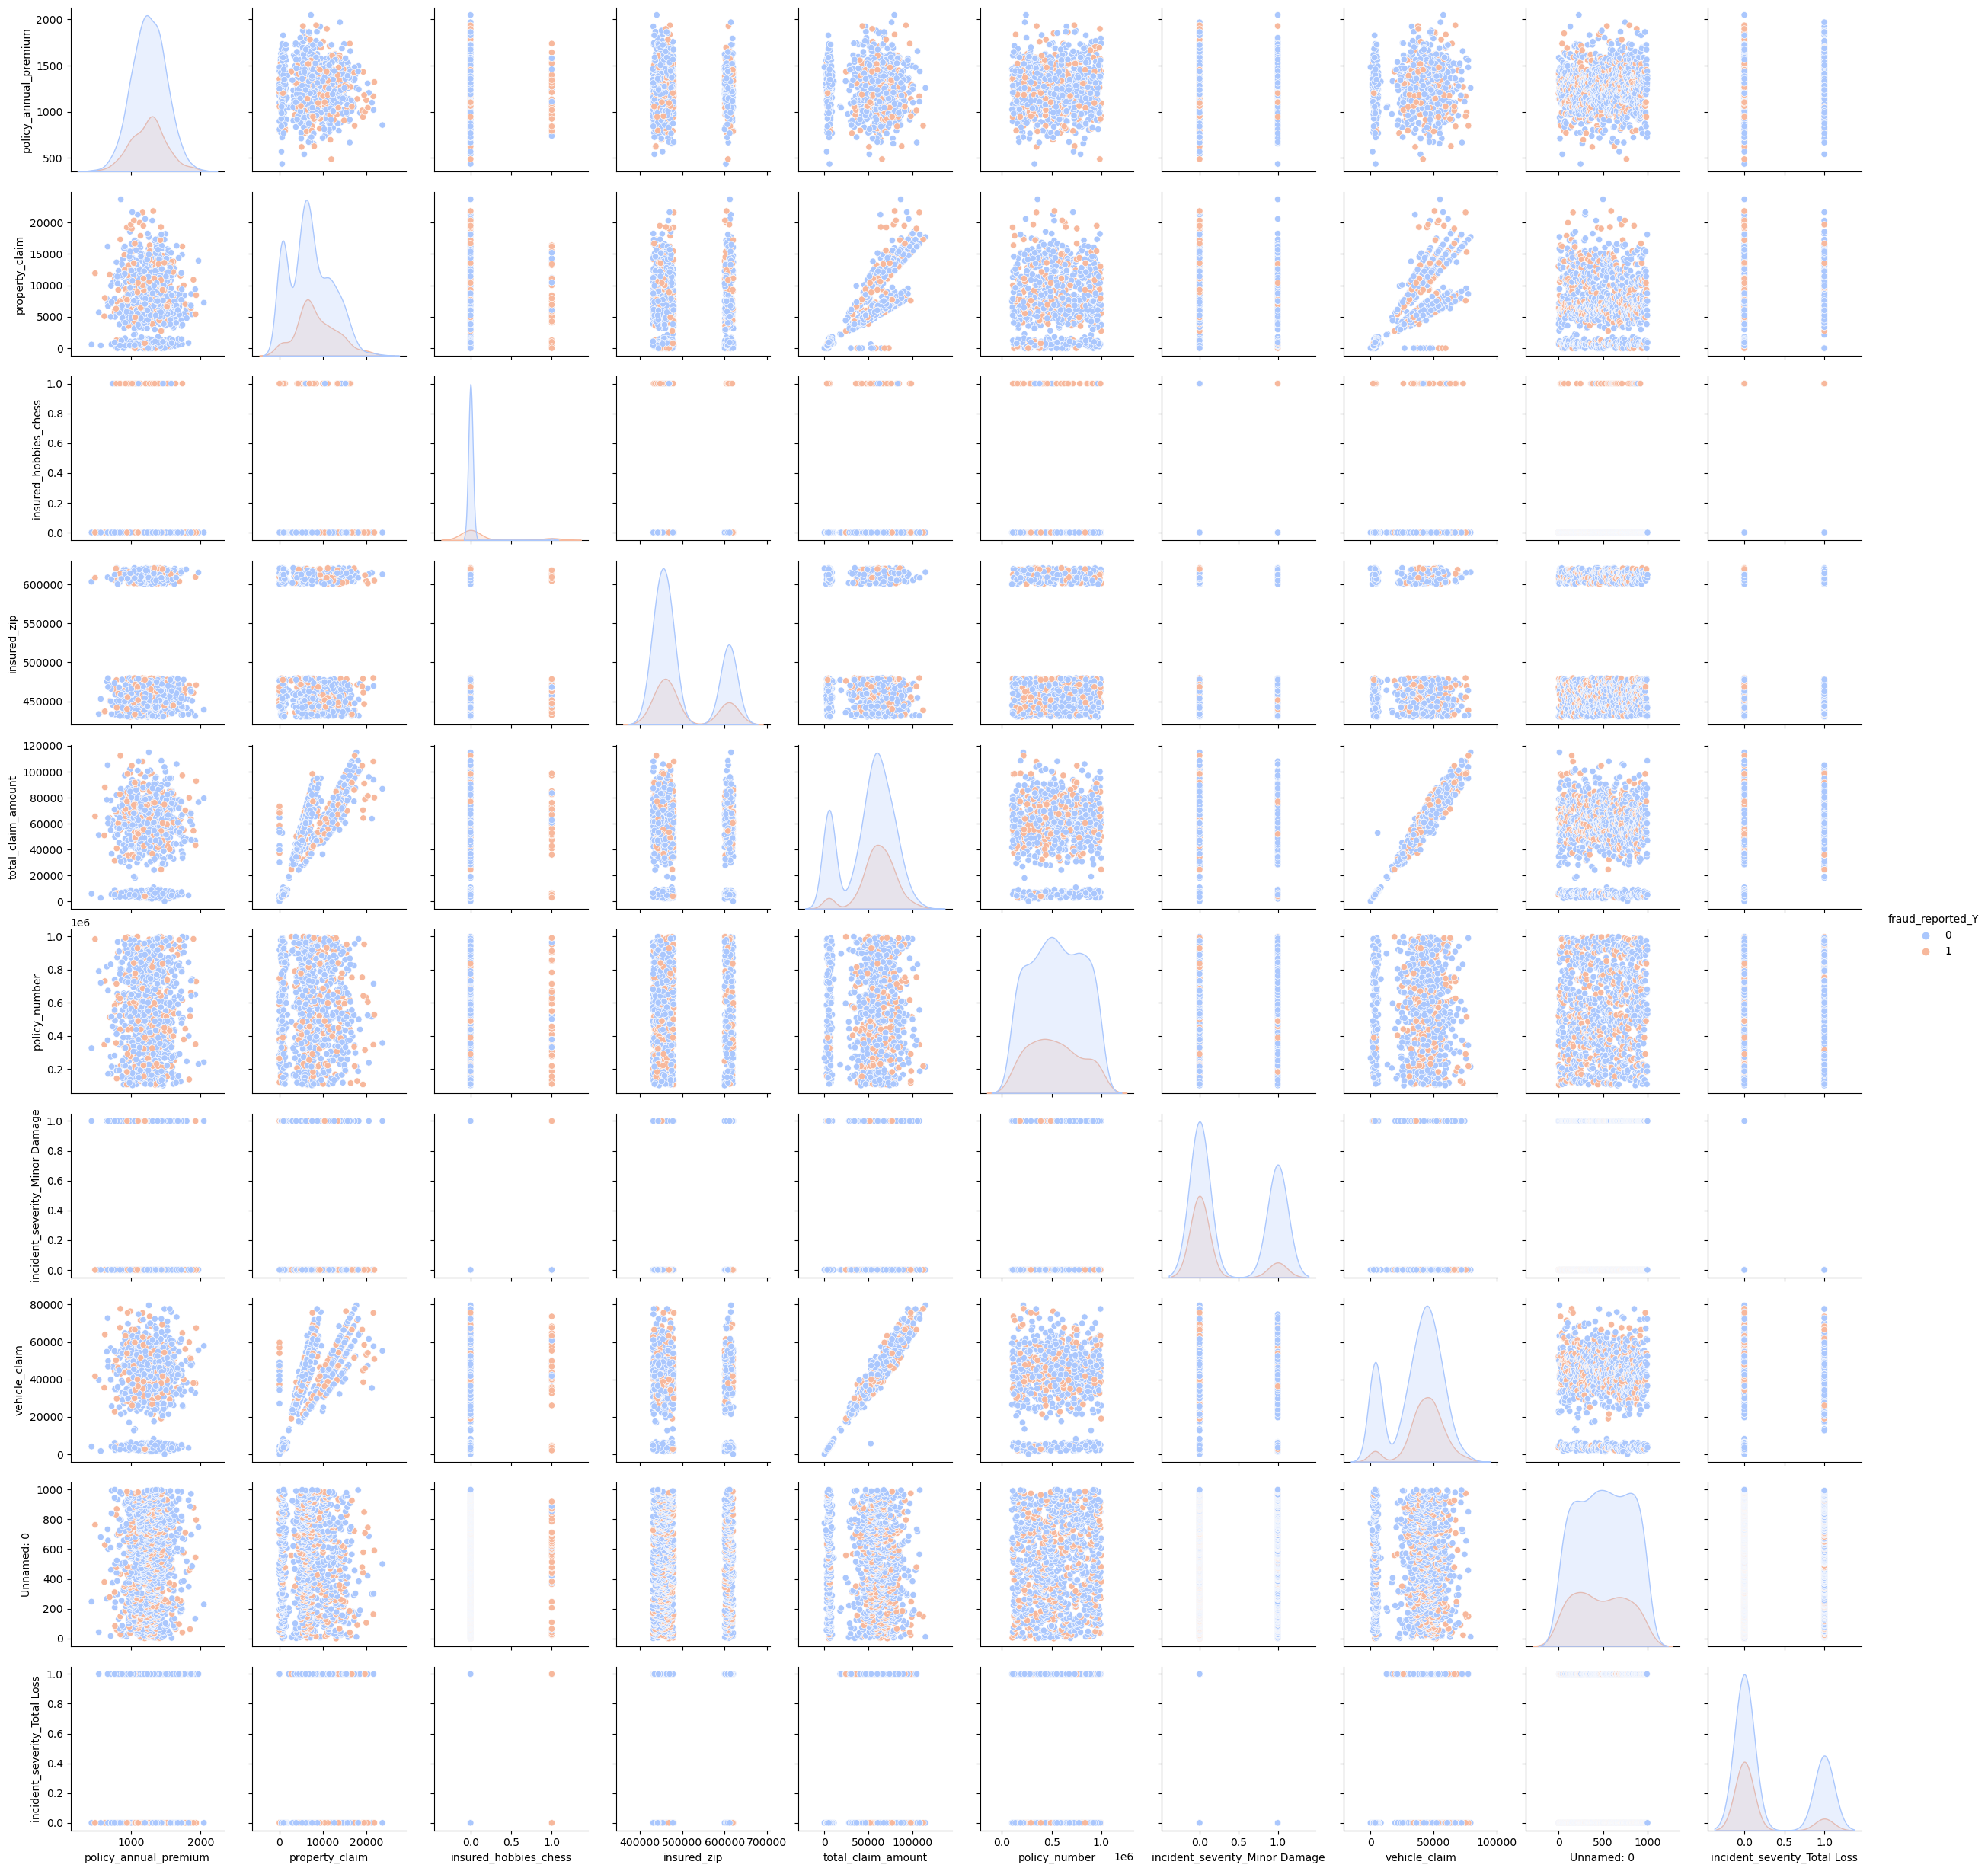

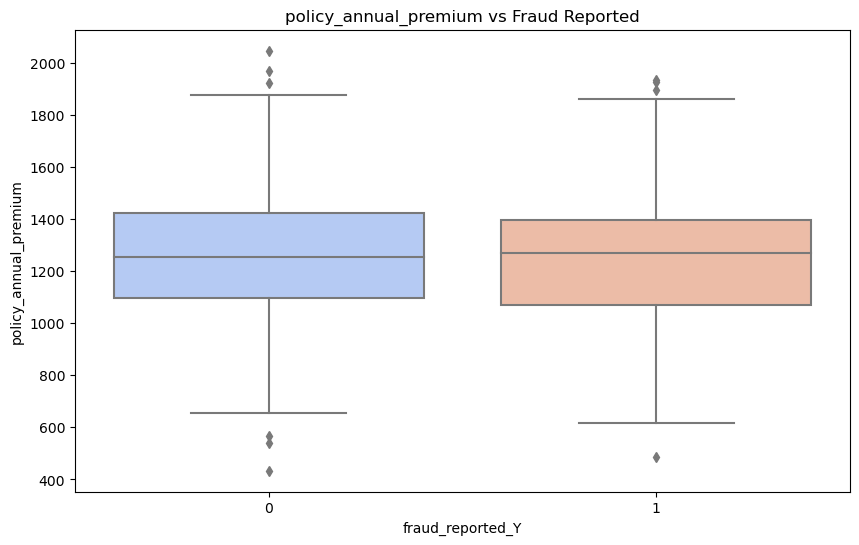

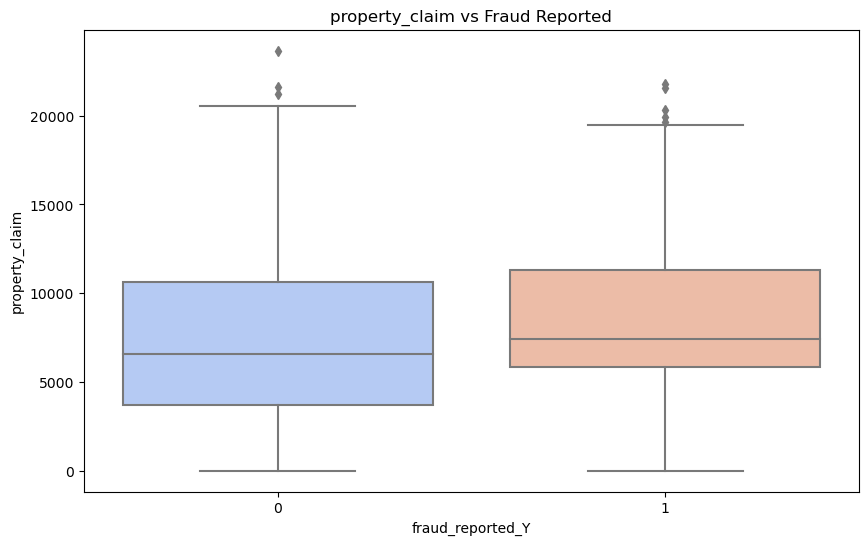

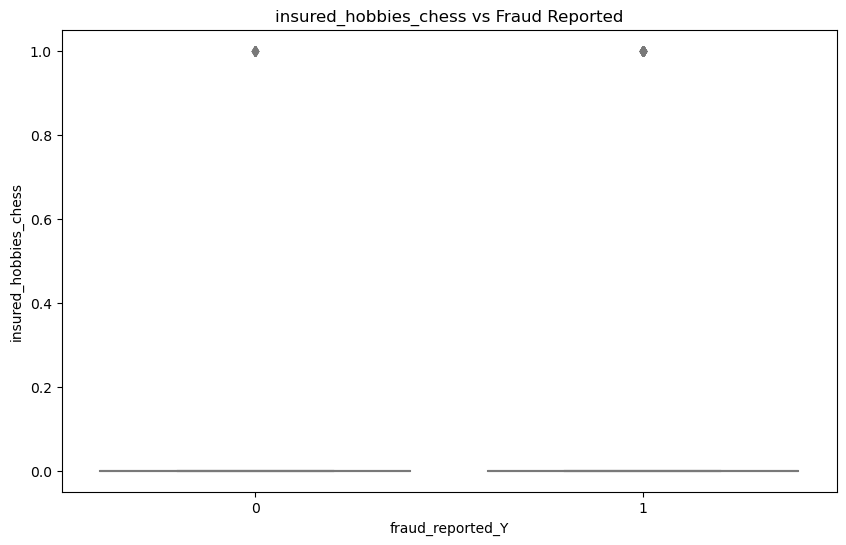

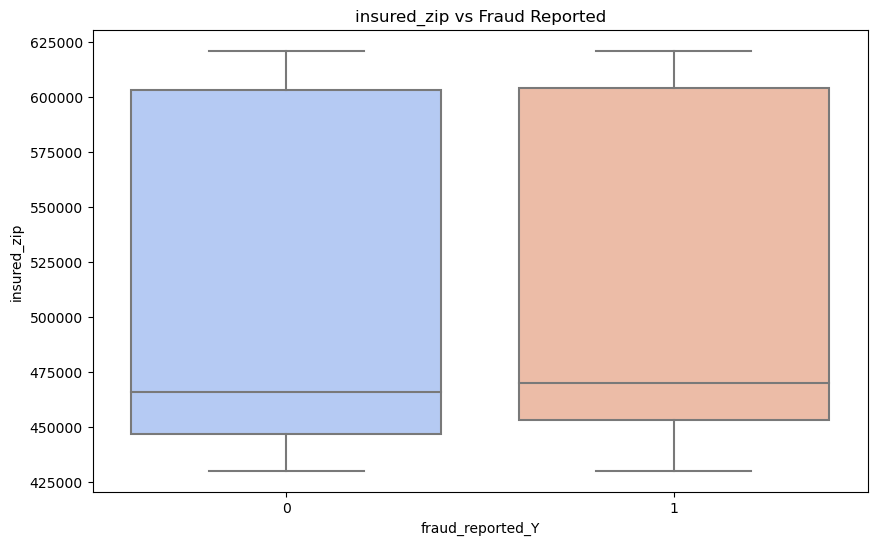

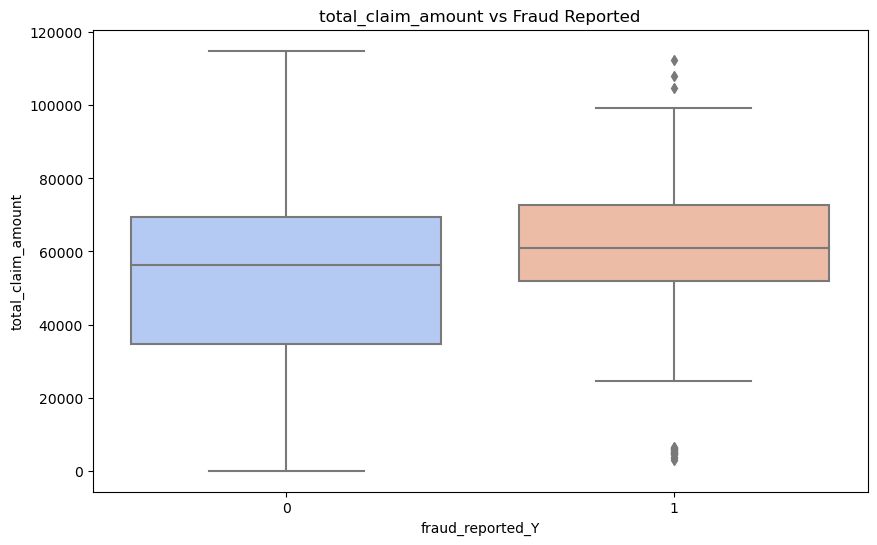

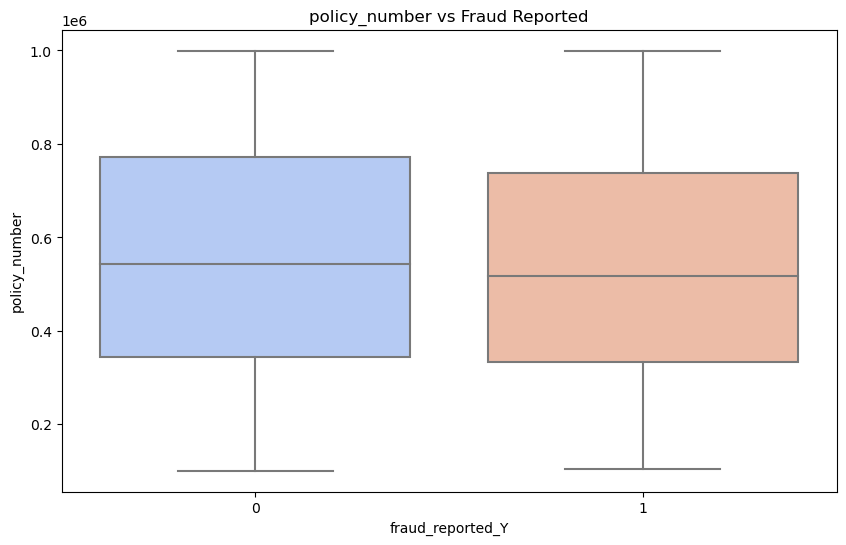

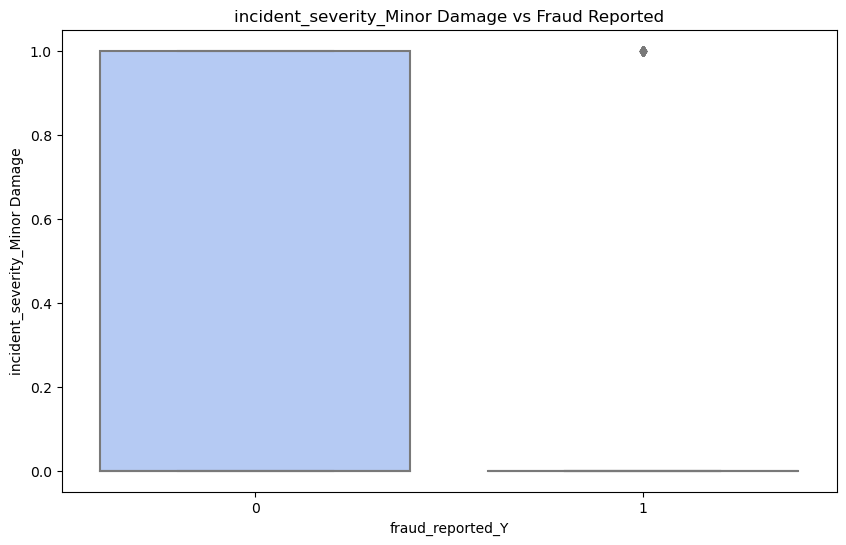

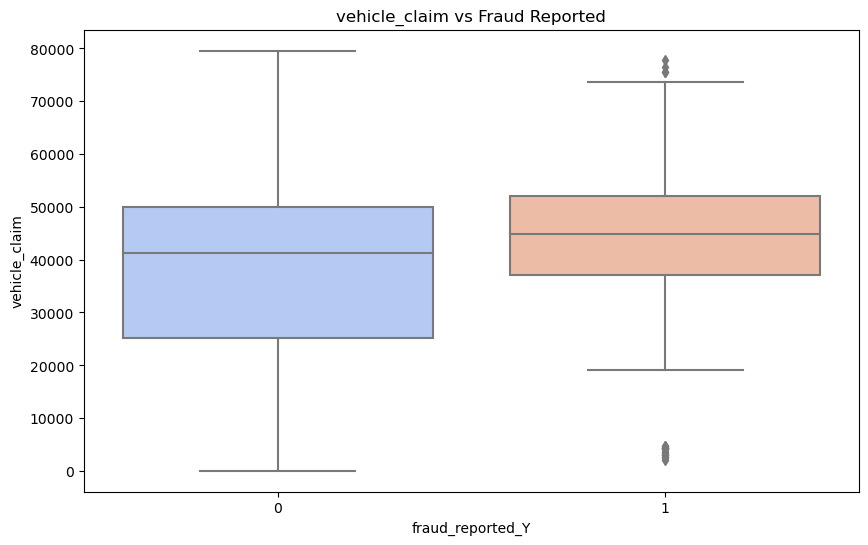

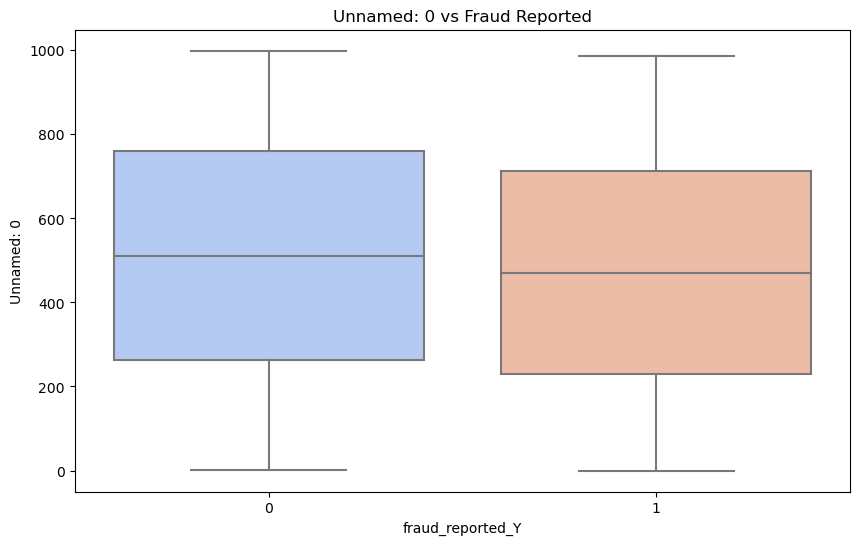

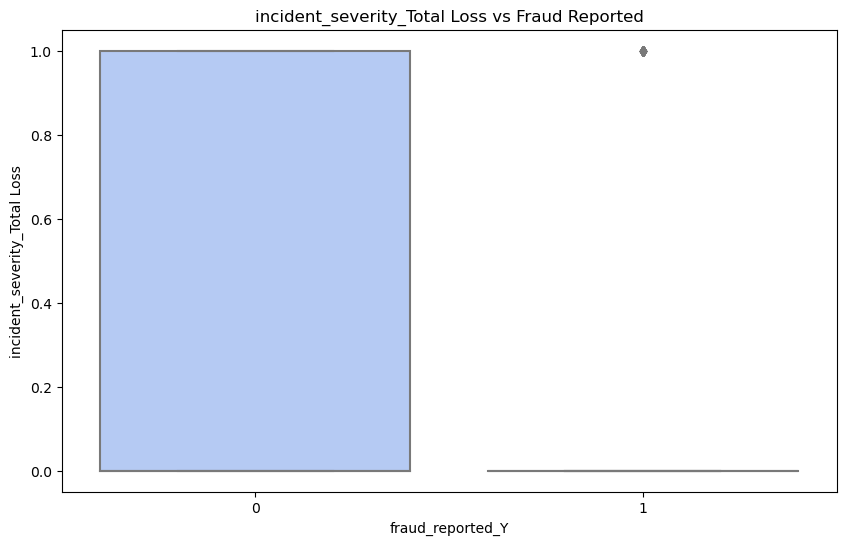

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 10 important features
top_features = feature_importance.head(10).index.tolist()

# Check if these top features are in the DataFrame
existing_top_features = [feature for feature in top_features if feature in df_encoded.columns]

# Compute the correlation matrix for the existing top features
corr_matrix = df_encoded[existing_top_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top 10 Important Features')
plt.show()

# Visualize pairwise relationships
sns.pairplot(df_encoded, vars=existing_top_features, hue='fraud_reported_Y', palette='coolwarm', diag_kind='kde')
plt.show()

# Visualize feature interactions with fraud
for feature in existing_top_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='fraud_reported_Y', y=feature, data=df_encoded, palette='coolwarm')
    plt.title(f'{feature} vs Fraud Reported')
    plt.show()


In [ ]:
# FRAUD DETECTION MODEL 

Index(['Unnamed: 0', 'months_as_customer', 'age', 'policy_number',
       'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'ages_category',
       'customer_category', 'Contract Years', 'total_premiums_paid',
       'net_value_of_customer', 'insured_hobbies_basketball',
       'insured_hobbies_board-games', 'insured_hobbies_bungie-ju

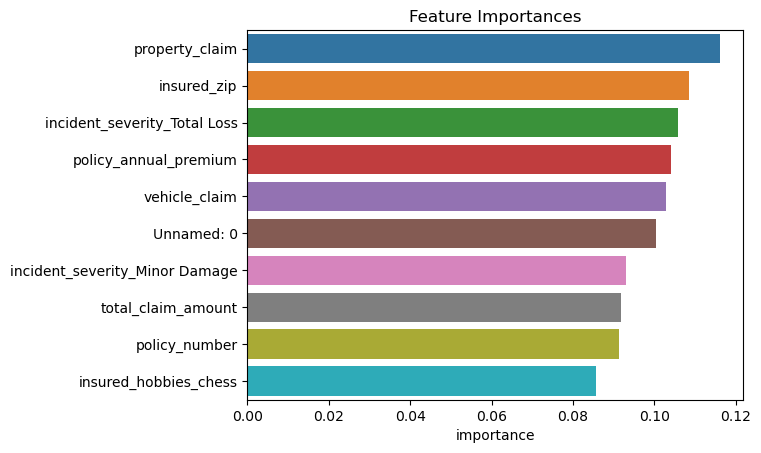

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('C:/Users/kholi/OneDrive/Documents/Data Science/Integrate Project/Advanced Features Claims Data.csv')

# Ensure the 'fraud_reported' column is binary (0 for No, 1 for Yes)
df['fraud_reported'] = df['fraud_reported'].apply(lambda x: 1 if x == 'Y' else 0)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['insured_hobbies', 'incident_severity'], drop_first=True)

# Print the column names to verify
print(df.columns)

# Select the important features identified earlier
important_features = [
    'policy_annual_premium', 'property_claim', 'insured_hobbies_chess',
    'insured_zip', 'total_claim_amount', 'policy_number',
    'incident_severity_Minor Damage', 'vehicle_claim',
    'Unnamed: 0', 'incident_severity_Total Loss'
]

# Update important_features list based on the actual columns present in the DataFrame
important_features = [feature for feature in important_features if feature in df.columns]

# Select the features and the target
X = df[important_features]
y = df['fraud_reported']

# Handle missing values
X = X.fillna(X.mean(axis=0))

# Handle infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean(axis=0))

# Handle very large values by capping them
max_threshold = X.quantile(0.99, axis=0)
X = X.clip(upper=max_threshold, axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plot the feature importances
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title("Feature Importances")
plt.show()


In [ ]:
# EXPLAINING THE MODEL AND FEAUTURES

The factors highlighted in the correlation matrix contribute to fraud detection by helping to identify
patterns and anomalies that are indicative of fraudulent behavior.Here’s how each of the most important
features can contribute to the detection of insurance fraud:

1. Policy Annual Premium:
    
Contribution: The annual premium amount may be used to assess the risk level of a policy. Unusual 
premium amounts, either very high or very low, could be indicative of fraud, especially if they don't 
align with the typical profile of the insured person or the coverage.
Example: If a policyholder with a modest lifestyle suddenly has a very high annual premium, it might 
raise a red flag for potential fraud.

2. Property Claim:
    
Contribution: The amount claimed for property damage can be an indicator of fraud if it is 
disproportionately high compared to similar claims or the estimated value of the property.
Example: A significantly high property claim amount, especially if it coincides with high total claim
amounts and vehicle claims, can signal potential fraud.

3. Insured Hobbies (Chess):
    
Contribution: While this specific hobby might not directly indicate fraud, the inclusion of hobbies 
can help profile the insured and identify inconsistencies in their reported lifestyle and claims.
Example: If a policyholder claims expensive losses related to a hobby they didn't previously report, 
it might be suspicious.

4. Insured Zip Code:
    
Contribution: Geographic location can be a significant factor in fraud detection. Certain areas may 
have higher incidences of fraud, or the claim might be inconsistent with the insured's location.
Example: Claims from areas known for high fraud rates might be scrutinized more closely.
    
5. Total Claim Amount:
    
Contribution: The total amount claimed across all incidents is a critical factor. Fraudulent claims
often involve exaggerated or completely false claim amounts.
Example: If the total claim amount is unusually high compared to the average for similar claims, 
it could indicate fraud.

6. Policy Number:
    
Contribution: While the policy number itself might not be directly indicative of fraud, the policy’s 
history and characteristics (such as new policies or those nearing expiration) can provide context.
Example: New policies with large claims shortly after initiation can be suspicious.
    
7. Incident Severity (Minor Damage and Total Loss):
    
Contribution: The severity of incidents can provide insights into potential fraud. Minor damages might
be exaggerated, or total loss claims might be fabricated.
Example: A pattern of claims with minor damage severity that do not match the incident report details 
can indicate fraud. Similarly, a total loss claim that doesn’t align with the incident circumstances 
might be flagged.

8. Vehicle Claim:
    
Contribution: Similar to property claims, vehicle claim amounts can indicate fraud if they are 
disproportionately high or if there are inconsistencies.
Example: High vehicle claim amounts in conjunction with high property and total claim amounts can be a
red flag.
